<a href="https://colab.research.google.com/github/kognavi/california-housing-linear-regression-/blob/main/california_housing_linear_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

--- データの最初の5行 ---
   MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  MedHouseVal  
0    -122.23        4.526  
1    -122.22        3.585  
2    -122.24        3.521  
3    -122.25        3.413  
4    -122.25        3.422  

--- データフレームの基本情報 ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MedInc       20640 non-null  float64
 1   HouseAge     20640 non-null  float64
 2   AveRooms     20640 non-null  float64
 3   AveBedrms   

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 24230 (\N{CJK UNIFIED IDEOGRAPH-5EA6}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 25968 (\N{CJK UNIFIED IDEOGRAPH-6570}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 20303 (\N{CJK UNIFIED IDEOGRAPH-4F4F}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 23429 (\N{CJK UNIFIED IDEOGRAPH-5B85}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 20385 (\N{CJK UNIFIED IDEOGRAPH-4FA1}) missing from font(s) DejaVu Sans.
  fig.canvas

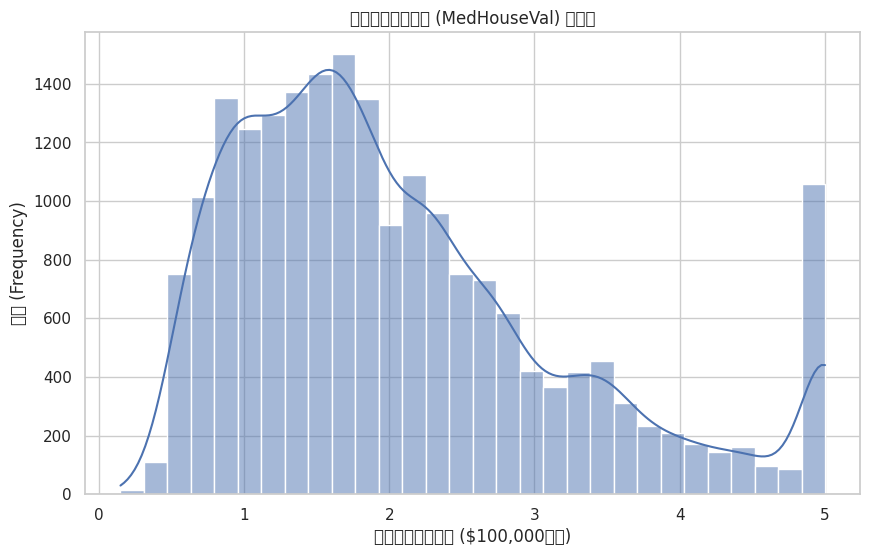

<ipython-input-3-8c02921cceb8>:87: UserWarning: Glyph 29305 (\N{CJK UNIFIED IDEOGRAPH-7279}) missing from font(s) DejaVu Sans.
  plt.tight_layout() # ラベルが重ならないように調整
<ipython-input-3-8c02921cceb8>:87: UserWarning: Glyph 24500 (\N{CJK UNIFIED IDEOGRAPH-5FB4}) missing from font(s) DejaVu Sans.
  plt.tight_layout() # ラベルが重ならないように調整
<ipython-input-3-8c02921cceb8>:87: UserWarning: Glyph 37327 (\N{CJK UNIFIED IDEOGRAPH-91CF}) missing from font(s) DejaVu Sans.
  plt.tight_layout() # ラベルが重ならないように調整
<ipython-input-3-8c02921cceb8>:87: UserWarning: Glyph 38291 (\N{CJK UNIFIED IDEOGRAPH-9593}) missing from font(s) DejaVu Sans.
  plt.tight_layout() # ラベルが重ならないように調整
<ipython-input-3-8c02921cceb8>:87: UserWarning: Glyph 12398 (\N{HIRAGANA LETTER NO}) missing from font(s) DejaVu Sans.
  plt.tight_layout() # ラベルが重ならないように調整
<ipython-input-3-8c02921cceb8>:87: UserWarning: Glyph 30456 (\N{CJK UNIFIED IDEOGRAPH-76F8}) missing from font(s) DejaVu Sans.
  plt.tight_layout() # ラベルが重ならないように調整
<ipython-input-3-8

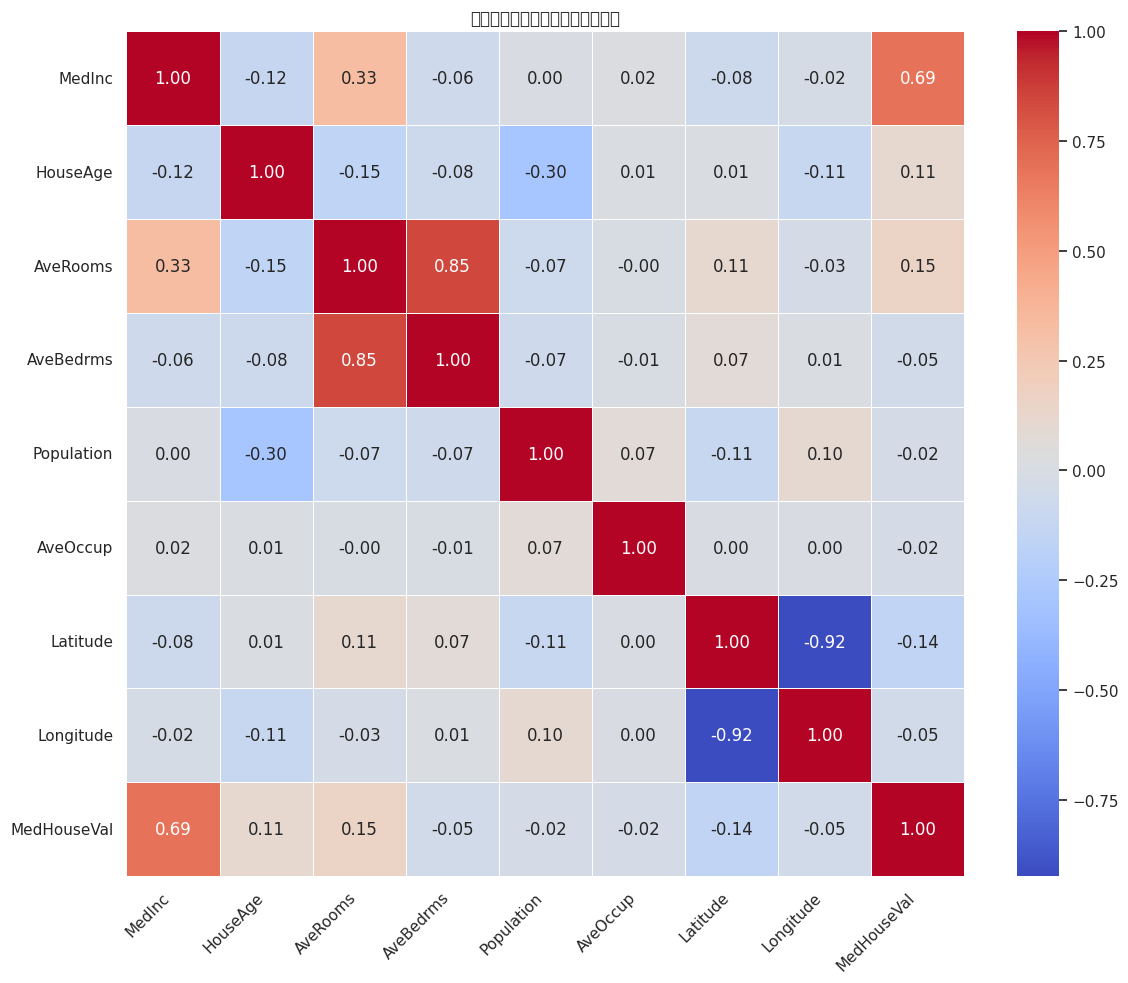

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 20303 (\N{CJK UNIFIED IDEOGRAPH-4F4F}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 23429 (\N{CJK UNIFIED IDEOGRAPH-5B85}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 20385 (\N{CJK UNIFIED IDEOGRAPH-4FA1}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 26684 (\N{CJK UNIFIED IDEOGRAPH-683C}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 12398 (\N{HIRAGANA LETTER NO}) missing from font(s) DejaVu Sans.
  fig.canvas.print_f

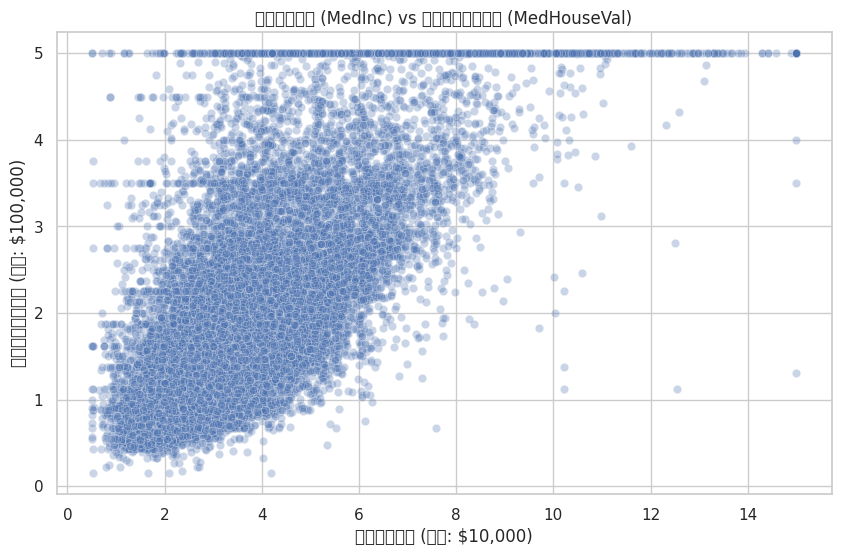

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 20303 (\N{CJK UNIFIED IDEOGRAPH-4F4F}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 23429 (\N{CJK UNIFIED IDEOGRAPH-5B85}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 20385 (\N{CJK UNIFIED IDEOGRAPH-4FA1}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 26684 (\N{CJK UNIFIED IDEOGRAPH-683C}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 12398 (\N{HIRAGANA LETTER NO}) missing from font(s) DejaVu Sans.
  fig.canvas.print_f

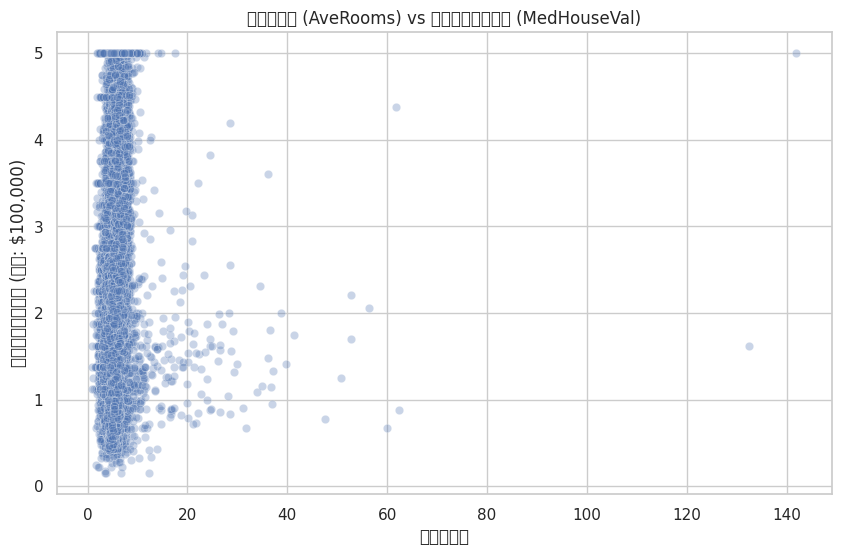

全データ数: 20640
訓練データのサンプル数 (X_train): 16512
テストデータのサンプル数 (X_test): 4128
訓練データのターゲット数 (y_train): 16512
テストデータのターゲット数 (y_test): 4128
モデルの訓練が完了しました。
決定係数 (R²): 0.5758
平均二乗誤差 (MSE): 0.5559
平均絶対誤差 (MAE): 0.5332


<ipython-input-3-8c02921cceb8>:172: UserWarning: Glyph 23455 (\N{CJK UNIFIED IDEOGRAPH-5B9F}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-3-8c02921cceb8>:172: UserWarning: Glyph 38555 (\N{CJK UNIFIED IDEOGRAPH-969B}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-3-8c02921cceb8>:172: UserWarning: Glyph 12398 (\N{HIRAGANA LETTER NO}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-3-8c02921cceb8>:172: UserWarning: Glyph 20303 (\N{CJK UNIFIED IDEOGRAPH-4F4F}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-3-8c02921cceb8>:172: UserWarning: Glyph 23429 (\N{CJK UNIFIED IDEOGRAPH-5B85}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-3-8c02921cceb8>:172: UserWarning: Glyph 20385 (\N{CJK UNIFIED IDEOGRAPH-4FA1}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-3-8c02921cceb8>:172: UserWarning: Glyph 26684 (\N{CJK UNIFIED IDEOGRAPH-683C}) missing from font(s)

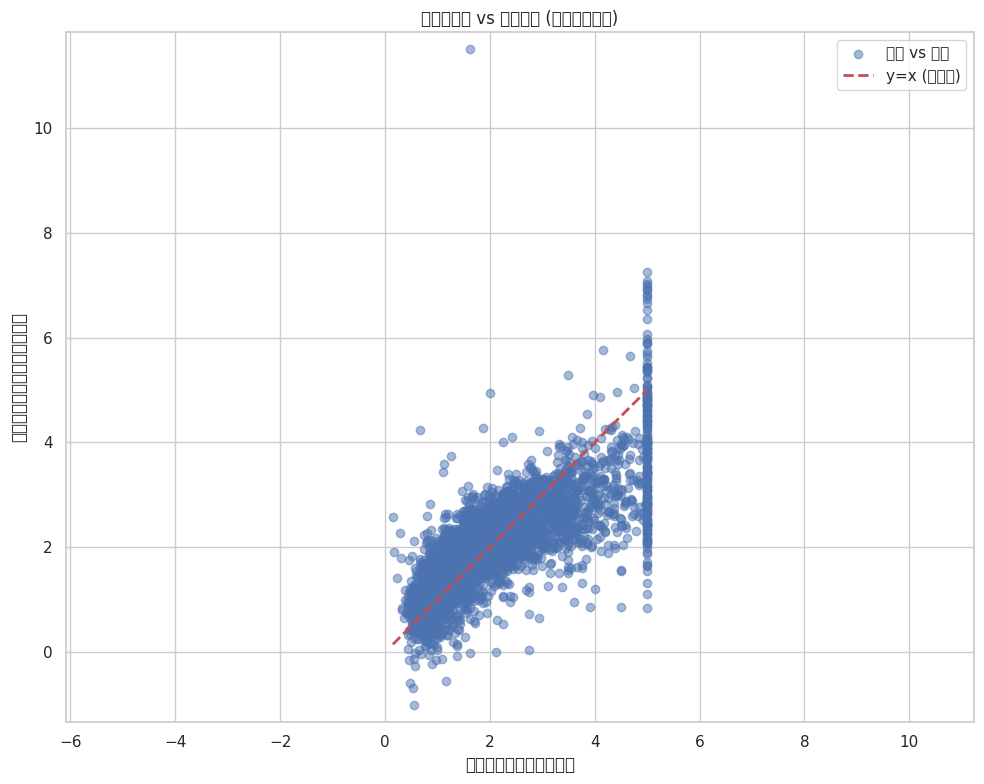

In [ ]:
# セル 1: Markdown
# # カリフォルニア住宅価格予測：線形回帰モデル
#
# ## 概要
# このNotebookでは、scikit-learnのカリフォルニア住宅データセットを用いて、線形回帰モデルによる住宅価格の中央値予測を行います。
#
# ## 分析フロー
# 1. ライブラリのインポートと設定
# 2. データの読み込み
# 3. データの確認
# 4. データ可視化 (EDA)
# 5. データの前処理 (訓練・テスト分割)
# 6. 線形回帰モデルの訓練
# 7. 予測と評価
# 8. 結果の可視化
# 9. 考察 # <--- フローに「考察」を追加

# セル 2: Code (ライブラリインポートと設定)
# coding: utf-8

# 日本語表示ライブラリのインストール (初回のみ必要)
# !pip install japanize_matplotlib # <--- コメントアウト

import pandas as pd
import numpy as np
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns
import japanize_matplotlib # 日本語化ライブラリ

# グラフスタイルの設定 (任意)
sns.set(style='whitegrid')

# セル 3: Markdown
# ## 2. データの読み込み
# scikit-learnからカリフォルニア住宅データセットを読み込み、DataFrameに格納します。

# セル 4: Code (データ読み込み) # <--- 読み込み専用セルに分割
california = fetch_california_housing(as_frame=True)
df = california.frame

# セル 5: Markdown
# ## 3. データの確認 # <--- 新しい見出し番号
# データの最初の数行、基本情報（列名、データ型、非欠損値数）、要約統計量、欠損値の有無を確認します。

# セル 6: Code (データ確認 - head) # <--- 確認用セルに分割
print("--- データの最初の5行 ---")
print(df.head())

# セル 7: Code (データ確認 - info) # <--- 確認用セルに分割
print("\n--- データフレームの基本情報 ---")
df.info()

# セル 8: Code (データ確認 - describe) # <--- 確認用セルに分割
print("\n--- 各列の要約統計量 ---")
print(df.describe())

# セル 9: Code (データ確認 - 欠損値) # <--- 確認用セルに分割
print("\n--- 欠損値の確認 ---")
print(df.isnull().sum())

# セル 10: Markdown
# ## 4. データ可視化 (EDA) # <--- 新しい見出し番号
# ターゲット変数 (MedHouseVal) の分布や、特徴量間の相関、価格と関連の強そうな特徴量との関係を可視化して確認します。

# セル 11: Code (ターゲット変数の分布)
# print("\n--- 住宅価格の中央値 (MedHouseVal) の分布 ---") # <--- print文を削除 (グラフタイトルで十分)
plt.figure(figsize=(10, 6))
sns.histplot(df['MedHouseVal'], kde=True, bins=30)
plt.title('住宅価格の中央値 (MedHouseVal) の分布')
plt.xlabel('住宅価格の中央値 ($100,000単位)')
plt.ylabel('度数 (Frequency)')
plt.grid(True)
plt.show()

# セル 12: Code (相関行列ヒートマップ)
# print("\n--- 特徴量間の相関行列ヒートマップ ---") # <--- print文を削除
correlation_matrix = df.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('特徴量間の相関行列ヒートマップ')
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout() # ラベルが重ならないように調整
plt.show()

# セル 13: Code (散布図 MedInc vs MedHouseVal)
# print("\n--- 収入の中央値 (MedInc) と住宅価格の中央値 (MedHouseVal) の散布図 ---") # <--- print文を削除
plt.figure(figsize=(10, 6))
sns.scatterplot(x='MedInc', y='MedHouseVal', data=df, alpha=0.3)
plt.title('収入の中央値 (MedInc) vs 住宅価格の中央値 (MedHouseVal)')
plt.xlabel('収入の中央値 (単位: $10,000)')
plt.ylabel('住宅価格の中央値 (単位: $100,000)')
plt.grid(True)
plt.show()

# セル 14: Code (散布図 AveRooms vs MedHouseVal)
# print("\n--- 平均部屋数 (AveRooms) と住宅価格の中央値 (MedHouseVal) の散布図 ---") # <--- print文を削除
plt.figure(figsize=(10, 6))
sns.scatterplot(x='AveRooms', y='MedHouseVal', data=df, alpha=0.3)
plt.title('平均部屋数 (AveRooms) vs 住宅価格の中央値 (MedHouseVal)')
plt.xlabel('平均部屋数')
plt.ylabel('住宅価格の中央値 (単位: $100,000)')
# plt.xlim(0, 20) # 外れ値の影響が大きい場合など、必要に応じてX軸の範囲を制限
plt.grid(True)
plt.show()

# セル 15: Markdown
# ## 5. データの前処理 (訓練・テスト分割) # <--- 新しい見出し番号
# モデルの訓練に使用するデータ (特徴量 `X` とターゲット `y`) と、モデルの性能評価に使用するテストデータに分割します。特徴量からはターゲット変数 `MedHouseVal` を除外します。

# セル 16: Code (データ分割)
X = df.drop('MedHouseVal', axis=1) # 特徴量: MedHouseVal以外の全ての列
y = df['MedHouseVal']             # ターゲット: MedHouseVal列
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"全データ数: {len(df)}")
print(f"訓練データのサンプル数 (X_train): {X_train.shape[0]}")
print(f"テストデータのサンプル数 (X_test): {X_test.shape[0]}")
print(f"訓練データのターゲット数 (y_train): {y_train.shape[0]}")
print(f"テストデータのターゲット数 (y_test): {y_test.shape[0]}")

# セル 17: Markdown
# ## 6. 線形回帰モデルの訓練 # <--- 新しい見出し番号
# 最も基本的な回帰モデルである線形回帰 (`LinearRegression`) を選択し、訓練データ (`X_train`, `y_train`) を使ってモデルを学習させます。
# これは、他の複雑なモデルと比較するためのベースライン（基準）となります。

# セル 18: Code (モデル訓練)
model = LinearRegression()
model.fit(X_train, y_train)
print("モデルの訓練が完了しました。")
# print(f"学習したモデル: {model}") # 必要であればモデルの詳細を表示

# セル 19: Markdown
# ## 7. 予測と評価 # <--- 新しい見出し番号
# 訓練済みモデルを使ってテストデータ (`X_test`) の住宅価格を予測 (`y_pred`) し、その性能を評価します。評価指標には以下を用います。
# - **決定係数 (R²)**: モデルがターゲット変数の分散をどれだけ説明できているかを示す指標 (1に近いほど良い)。
# - **平均二乗誤差 (MSE)**: 予測値と実際の値の差（誤差）の二乗の平均 (0に近いほど良い)。外れ値に敏感。
# - **平均絶対誤差 (MAE)**: 予測値と実際の値の差の絶対値の平均 (0に近いほど良い)。誤差の大きさを直感的に理解しやすい。

# セル 20: Code (予測と評価)
y_pred = model.predict(X_test)

# 評価指標の計算
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

# 評価結果の表示
print(f"決定係数 (R²): {r2:.4f}")
print(f"平均二乗誤差 (MSE): {mse:.4f}")
print(f"平均絶対誤差 (MAE): {mae:.4f}")

# セル 21: Markdown
# ## 8. 結果の可視化 # <--- 新しい見出し番号
# テストデータにおける実際の価格 (`y_test`) とモデルによる予測価格 (`y_pred`) を散布図で比較します。
# 点が赤い破線 (y=x の線) に近いほど、予測が正確であることを示します。

# セル 22: Code (結果の可視化)
plt.figure(figsize=(10, 8))
plt.scatter(y_test, y_pred, alpha=0.5, label='予測 vs 実際') # alphaを調整して点の重なりを見やすく
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--r', linewidth=2, label='y=x (理想線)')
plt.xlabel("実際の住宅価格の中央値")
plt.ylabel("予測された住宅価格の中央値")
plt.title("実際の価格 vs 予測価格 (テストデータ)")
plt.legend() # 凡例を表示
plt.grid(True)
plt.axis('equal') # X軸とY軸のスケールを合わせる
plt.tight_layout()
plt.show()

# セル 23: Markdown
# ## 9. 考察 # <--- 新しい見出し番号
# - **モデル性能**:
#   - 決定係数 R² は約 0.58 であり、この線形回帰モデルはテストデータにおける住宅価格の変動の約58%を説明できていることを示します。これは、まだ改善の余地が大きいことを意味します。
#   - 平均絶対誤差 (MAE) は約 0.53 であり、平均すると予測は約 $53,000 ドルずれていることを示唆しています ($100,000 単位なので)。
# - **可視化結果**:
#   - 散布図を見ると、全体的に右上がりの傾向があり、ある程度の相関は捉えられていますが、点のばらつきは大きいです。
#   - 特に、実際の価格が高い領域 (右上の領域) で、予測値が実際の値よりも低くなる傾向（過小評価）が見られます。これは、線形モデルでは捉えきれない非線形な関係や、価格上限の影響などが考えられます。
# - **今後の改善**:
#   - **特徴量エンジニアリング**: 既存の特徴量から新しい特徴量を作成する（例: 部屋あたりの寝室数、所得と部屋数の交互作用項など）。
#   - **モデルの変更**: 非線形な関係をより良く捉えられるモデル（例: 多項式回帰、ランダムフォレスト、勾配ブースティング木など）を試す。
#   - **外れ値の処理**: EDAで確認した外れ値（特に AveRooms など）がモデルに与える影響を検討し、必要であれば処理を行う。
#   - **データのスケーリング**: 特徴量間のスケールが大きく異なるため、標準化や正規化を行うことで、モデルの学習が安定・向上する可能性があります（線形回帰では必須ではないことが多いですが、他のモデルでは重要になる場合があります）。

# セル 24: Code (オプション: モデル係数の表示)
# print("\n--- (参考) 学習したモデルの係数と切片 ---")
# coefficients = pd.DataFrame(model.coef_, X.columns, columns=['係数'])
# print(coefficients.sort_values('係数', ascending=False)) # 係数の大きさ順にソート
# print(f"\n切片 (Intercept): {model.intercept_:.4f}")
